# Project 2. HMM 적용하여 데이터 모델링 해보기 (자유주제)

## Hidden Markov Model

* 은닉마코프모델 계산 및 구현
  * https://ratsgo.github.io/machine%20learning/2017/10/14/computeHMMs/
* https://web.stanford.edu/~jurafsky/slp3/A.pdf
  
## ~~Taxi Service Trajectory (TST)~~
* Taxi Service Trajectory (TST) Prediction Challenge 2015
  * http://www.geolink.pt/ecmlpkdd2015-challenge/index.html
  * Artificial Neural Networks Applied to Taxi Destination Prediction
    * https://arxiv.org/pdf/1508.00021.pdf
  
## Human Activity Recognition (HAR)
* ~~Smartphone Dataset for Human Activity Recognition (HAR) in Ambient Assisted Living (AAL) Data Set~~
  * [Dataset](https://archive.ics.uci.edu/ml/datasets/Smartphone+Dataset+for+Human+Activity+Recognition+%28HAR%29+in+Ambient+Assisted+Living+%28AAL%29)
  * Author
    * *Kadian Alicia Davis, Evans Boateng Owusu* 
  * Structure
    * Triaxial acceleration from the accelerometer (total acceleration)
      * `final_acc_train.txt`, `final_acc_test.txt`
    * Triaxial Angular velocity from the gyroscope. 
      * `final_gyro_train.txt`, `final_gyro_test.txt` 
    * A 561-feature vector with time and frequency domain variables 
      * `final_X_train.txt`, `final_X_test.txt`
    * The corresponding activity labels
      * `final_y_train.txt`, `final_y_test.txt`
* **Human Activity Recognition Using Smartphones Data Set**
  * [Dataset](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)
  * Author
    * *Jorge L. Reyes-Ortiz, Davide Anguita, Alessandro Ghio, Luca Oneto and Xavier Parra*
  * Structure
    * Raw Data
      * `acc_exp#{1~61}_user{1~30}.txt`
      * `gyro_exp#{1~61}_user{1~30}.txt`
      * `labels.txt`

In [1]:
from scipy import io
from hmmlearn import hmm

import matplotlib.pyplot as plt
import numpy as np
import time

labels = np.loadtxt('./HAR/RawData/labels.txt', delimiter=' ', dtype=int)
N = len(labels)

acc = np.empty((N), dtype=object)
gyro = np.empty((N), dtype=object)

y = np.empty((N),dtype=int)

actions =['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
          'STANDING', 'LAYING', 'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 
          'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']
num_actions = len(actions)

In [2]:
prev = ''
acc_file = np.empty([])
gyro_file = np.empty([])
for (i, row) in enumerate(labels):
    filename = 'exp{:02d}_user{:02d}.txt'.format(row[0], row[1])
    
    if prev != filename:
        acc_file = np.loadtxt('./HAR/RawData/acc_' + filename, delimiter=' ')
        gyro_file = np.loadtxt('./HAR/RawData/gyro_' + filename, delimiter=' ')
        prev = filename
        print(filename)
    
    acc[i] = acc_file[row[3]:row[4]+1, :]
    gyro[i] = gyro_file[row[3]:row[4]+1, :]
    y[i] = row[2]-1

exp01_user01.txt
exp02_user01.txt
exp03_user02.txt
exp04_user02.txt
exp05_user03.txt
exp06_user03.txt
exp07_user04.txt
exp08_user04.txt
exp09_user05.txt
exp10_user05.txt
exp11_user06.txt
exp12_user06.txt
exp13_user07.txt
exp14_user07.txt
exp15_user08.txt
exp16_user08.txt
exp17_user09.txt
exp18_user09.txt
exp19_user10.txt
exp20_user10.txt
exp21_user10.txt
exp22_user11.txt
exp23_user11.txt
exp24_user12.txt
exp25_user12.txt
exp26_user13.txt
exp27_user13.txt
exp28_user14.txt
exp29_user14.txt
exp30_user15.txt
exp31_user15.txt
exp32_user16.txt
exp33_user16.txt
exp34_user17.txt
exp35_user17.txt
exp36_user18.txt
exp37_user18.txt
exp38_user19.txt
exp39_user19.txt
exp40_user20.txt
exp41_user20.txt
exp42_user21.txt
exp43_user21.txt
exp44_user22.txt
exp45_user22.txt
exp46_user23.txt
exp47_user23.txt
exp48_user24.txt
exp49_user24.txt
exp50_user25.txt
exp51_user25.txt
exp52_user26.txt
exp53_user26.txt
exp54_user27.txt
exp55_user27.txt
exp56_user28.txt
exp57_user28.txt
exp58_user29.txt
exp59_user29.t

In [3]:
for i in range(N):
    print(acc[i].shape, gyro[i].shape, actions[y[i]])

(983, 3) (983, 3) STANDING
(160, 3) (160, 3) STAND_TO_SIT
(802, 3) (802, 3) SITTING
(165, 3) (165, 3) SIT_TO_STAND
(1015, 3) (1015, 3) STANDING
(288, 3) (288, 3) STAND_TO_LIE
(876, 3) (876, 3) LAYING
(197, 3) (197, 3) LIE_TO_SIT
(932, 3) (932, 3) SITTING
(192, 3) (192, 3) SIT_TO_LIE
(927, 3) (927, 3) LAYING
(191, 3) (191, 3) LIE_TO_STAND
(583, 3) (583, 3) WALKING
(895, 3) (895, 3) WALKING
(911, 3) (911, 3) WALKING
(965, 3) (965, 3) WALKING
(656, 3) (656, 3) WALKING_DOWNSTAIRS
(631, 3) (631, 3) WALKING_UPSTAIRS
(624, 3) (624, 3) WALKING_DOWNSTAIRS
(666, 3) (666, 3) WALKING_UPSTAIRS
(624, 3) (624, 3) WALKING_DOWNSTAIRS
(673, 3) (673, 3) WALKING_UPSTAIRS
(976, 3) (976, 3) STANDING
(206, 3) (206, 3) STAND_TO_SIT
(789, 3) (789, 3) SITTING
(156, 3) (156, 3) SIT_TO_STAND
(927, 3) (927, 3) STANDING
(268, 3) (268, 3) STAND_TO_LIE
(863, 3) (863, 3) LAYING
(184, 3) (184, 3) LIE_TO_SIT
(833, 3) (833, 3) SITTING
(237, 3) (237, 3) SIT_TO_LIE
(778, 3) (778, 3) LAYING
(242, 3) (242, 3) LIE_TO_STAND
(6

(650, 3) (650, 3) WALKING_UPSTAIRS
(656, 3) (656, 3) WALKING_DOWNSTAIRS
(670, 3) (670, 3) WALKING_UPSTAIRS
(1332, 3) (1332, 3) STANDING
(151, 3) (151, 3) STAND_TO_SIT
(1135, 3) (1135, 3) SITTING
(102, 3) (102, 3) SIT_TO_STAND
(1217, 3) (1217, 3) STANDING
(167, 3) (167, 3) STAND_TO_LIE
(1317, 3) (1317, 3) LAYING
(174, 3) (174, 3) LIE_TO_SIT
(1243, 3) (1243, 3) SITTING
(213, 3) (213, 3) SIT_TO_LIE
(1541, 3) (1541, 3) LAYING
(183, 3) (183, 3) LIE_TO_STAND
(1103, 3) (1103, 3) WALKING
(1070, 3) (1070, 3) WALKING
(692, 3) (692, 3) WALKING_DOWNSTAIRS
(657, 3) (657, 3) WALKING_UPSTAIRS
(604, 3) (604, 3) WALKING_DOWNSTAIRS
(672, 3) (672, 3) WALKING_UPSTAIRS
(623, 3) (623, 3) WALKING_DOWNSTAIRS
(647, 3) (647, 3) WALKING_UPSTAIRS
(1265, 3) (1265, 3) STANDING
(168, 3) (168, 3) STAND_TO_SIT
(1264, 3) (1264, 3) SITTING
(98, 3) (98, 3) SIT_TO_STAND
(1307, 3) (1307, 3) STANDING
(216, 3) (216, 3) STAND_TO_LIE
(1234, 3) (1234, 3) LAYING
(154, 3) (154, 3) LIE_TO_SIT
(1356, 3) (1356, 3) SITTING
(227, 3) (

In [4]:
obs = np.empty((N), dtype=object)
origin_data = np.empty((N, 3), dtype=object)

def get_observation(acc, gyro):
    time = acc.shape[0]
    obs = np.empty((time), dtype=int)
    for t in range(time):
        jerkNum = accNum = gyroNum = 0
        jerk = np.zeros((3), dtype=float)
        for i in range(3):
            if t > 0:
                jerk[i] = acc[t, i] - acc[t-1, i]
                
            if jerk[i] > 0:
                jerkNum += (1 << (2-i))
            if acc[t, i] > 0:
                accNum += (1 << (2-i))
            if gyro[t, i] > 0:
                gyroNum += (1 << (2-i))
                
            
#         jerk8: 50.81967213114754%
#         obs[t] = jerkNum

#         acc8: 35.245901639344254%
#         obs[t] = accNum

#         vel8: 60.65573770491803%
#         obs[t] = gyroNum


#         jerk2vel8: 63.934426229508205%
#         if jerk[2] > 0:
#             jerkNum = 1
#         else:
#             jerkNum = 0
#         obs[t] = jerkNum*8 + gyroNum

#         jerk4vel8: 79.50819672131148%
#         jerkNum = 0
#         for i in range(2):
#             if jerk[i] > 0:
#                 jerkNum += (1 << (1-i))
#         obs[t] = jerkNum*8 + gyroNum

#         jerk8vel8: 84.42622950819671%
        obs[t] = jerkNum*8 + gyroNum

#         acc8vel8: 78.68852459016394%
#         obs[t] = accNum*8 + gyroNum

#         jerk8acc8: 40.16393442622951%
#         obs[t] = jerkNum*8 + accNum

    return obs

for i in range(N):
    obs[i] = get_observation(acc[i], gyro[i])
    origin_data[i] = [y[i], obs[i], i]

print(origin_data.shape)

(1214, 3)


## train_test_split
* `train_size : test_size = 90 : 10`

In [5]:
from sklearn.model_selection import train_test_split

# train, test split
train_data, test_data = train_test_split(origin_data, test_size=0.1)

# sort in charlabel
train_data = train_data[train_data[:, 0].argsort()]
test_data = test_data[test_data[:, 0].argsort()]

print('train:', train_data.shape)
print('test:', test_data.shape)
print(test_data)

train: (1092, 3)
test: (122, 3)
[[0
  array([ 5, 37, 37, 39, 12, 24,  0, 32, 34, 42, 58, 58, 18,  3, 19,  3, 19,
       11,  3, 11, 11, 11, 42, 40, 24, 60, 60, 53, 49, 48, 48, 58, 26, 27,
        3, 34,  5,  7, 30, 30, 28, 52, 52, 44, 12, 12, 28, 20, 60, 52, 53,
       53, 45, 47, 39, 39,  7, 39, 47, 30, 28, 52, 38,  8,  0,  0, 32, 42,
       42, 26, 26, 19, 19, 27,  3, 11, 11, 11,  9,  1, 49, 53, 52, 60, 50,
        0, 57, 43,  2,  2, 34,  7,  7, 23, 30, 28, 60, 52, 36, 36,  4,  4,
       28, 52, 53, 53, 63, 15,  9, 41, 33, 37, 39, 47, 63, 60, 52, 38, 10,
       24,  0, 32, 34, 42, 42, 26, 26, 19, 19, 19,  3, 11, 11, 11,  9, 57,
       52, 52, 52, 52, 52,  0, 59, 58,  2,  3, 39,  7, 30, 30, 20, 52, 48,
       40,  4, 12,  4, 20, 52, 53, 53, 61, 47, 11, 43, 43, 47, 47, 22, 60,
       36, 36,  0,  8,  0, 32, 34, 42, 58, 26, 19, 19, 19,  3,  3, 11, 11,
       11,  9, 49, 53, 52, 52, 36, 48, 57, 57,  2,  2,  2,  7,  7, 30, 20,
        4, 52, 36,  4, 12, 12,  4, 20, 53,  5, 53, 61, 45, 41,

In [6]:
idx = np.zeros(num_actions + 1, dtype=int)
for i in range(train_data.shape[0]):
    idx[train_data[i][0]+1] = i+1;

# Human Activity Recognition HMM
## HMM Learn
* `hmmlearn` Tutorial
  * https://hmmlearn.readthedocs.io/en/latest/tutorial.html
* `MultinomialHMM` API Reference
  * https://hmmlearn.readthedocs.io/en/latest/api.html#multinomialhmm

In [7]:
models = np.empty((num_actions), dtype=object)
for i in range(num_actions):
    models[i] = hmm.MultinomialHMM(n_components=32, verbose=False, n_iter=1)

# multinomial HMM learn
very_start_time = time.time()
for i in range(num_actions):
    start_time = time.time()
    trainRange = range(idx[i], idx[i+1])
    print('Training', actions[i], 'model w.', idx[i+1]-idx[i], 'examples', end=' ')

    trainX = np.concatenate([train_data[j][1].reshape(-1, 1) for j in trainRange])
    lengths = [len(train_data[j][1]) for j in trainRange]

    models[i].fit(trainX, lengths)
    print("(elapsed time: {}s).".format(time.time() - start_time))

print("Total elapsed time: {}s.".format(time.time() - very_start_time))

Training WALKING model w. 113 examples (elapsed time: 29.957597017288208s).
Training WALKING_UPSTAIRS model w. 166 examples (elapsed time: 28.391546487808228s).
Training WALKING_DOWNSTAIRS model w. 163 examples (elapsed time: 26.05307912826538s).
Training SITTING model w. 105 examples (elapsed time: 28.87263584136963s).
Training STANDING model w. 111 examples (elapsed time: 33.24045276641846s).
Training LAYING model w. 112 examples (elapsed time: 33.41602301597595s).
Training STAND_TO_SIT model w. 51 examples (elapsed time: 2.3055837154388428s).
Training SIT_TO_STAND model w. 54 examples (elapsed time: 1.845775842666626s).
Training SIT_TO_LIE model w. 58 examples (elapsed time: 3.19126033782959s).
Training LIE_TO_SIT model w. 55 examples (elapsed time: 2.7220897674560547s).
Training STAND_TO_LIE model w. 48 examples (elapsed time: 3.233877182006836s).
Training LIE_TO_STAND model w. 56 examples (elapsed time: 2.786048173904419s).
Total elapsed time: 196.0172519683838s.


In [8]:
def test_hmm_models(hmm_models):
    testSize = test_data.shape[0]
    wrongCases = 0

    print('=================== Wrong Cases ===================')
    for i in range(testSize):
        testX = np.concatenate([test_data[i][1].reshape(-1, 1)])

        maxScore = hmm_models[0].score(testX)
        maxAction = 0

        for action in range(num_actions):
            score = hmm_models[action].score(testX)
            if maxScore < score:
                maxScore = score
                maxAction = action

        if not test_data[i][0] == maxAction:
            print(actions[test_data[i][0]], actions[maxAction], maxScore, test_data[i][0] == maxAction)
            wrongCases += 1
            
            expect = origin_data[test_data[i][2]][1]
            result = origin_data[train_data[idx[maxAction]][2]][1]
            
            ax1 = plt.subplot('211')
            ax1.set_ylabel('state')
            ax1.set_title('{} vs. {}'.format(actions[test_data[i][0]], actions[maxAction]))
            plt.plot(expect)
            
            ax2 = plt.subplot('212', sharex=ax1, sharey=ax1)
            ax2.set_ylabel('state')
            ax2.set_xlabel('time')
            plt.plot(result)
            
            plt.show()

    print('(Wrong, Total)', (wrongCases, testSize))
    print('Accuracy: {}%'.format((1 - wrongCases/testSize) * 100))

In [9]:
import pickle
import os
def save_hmm_models(models, name):
    if os.path.exists('./Models/' + name):
        os.system("rm -rf " + './Models/' + name)
    os.mkdir('./Models/' + name)
    for i in range(num_actions):
        filename = './Models/{}/{}_{:02d}_{}.pkl'.format(name, name, i, actions[i])
        with open(filename, 'wb') as file: pickle.dump(models[i], file)
        print('Save', filename)

In [10]:
save_hmm_models(models, 'jerk8vel8iter1')

Save ./Models/jerk8vel8iter1/jerk8vel8iter1_00_WALKING.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_01_WALKING_UPSTAIRS.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_02_WALKING_DOWNSTAIRS.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_03_SITTING.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_04_STANDING.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_05_LAYING.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_06_STAND_TO_SIT.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_07_SIT_TO_STAND.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_08_SIT_TO_LIE.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_09_LIE_TO_SIT.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_10_STAND_TO_LIE.pkl
Save ./Models/jerk8vel8iter1/jerk8vel8iter1_11_LIE_TO_STAND.pkl


In [11]:
import pickle
def load_hmm_models(name):
    hmm_models = []
    for i in range(num_actions):
        filename = './Models/{}/{}_{:02d}_{}.pkl'.format(name, name, i, actions[i])
        with open(filename, 'rb') as file: hmm_models.append(pickle.load(file))
        print('Open', filename)
    return hmm_models

Open ./Models/jerk8vel8iter1/jerk8vel8iter1_00_WALKING.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_01_WALKING_UPSTAIRS.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_02_WALKING_DOWNSTAIRS.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_03_SITTING.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_04_STANDING.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_05_LAYING.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_06_STAND_TO_SIT.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_07_SIT_TO_STAND.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_08_SIT_TO_LIE.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_09_LIE_TO_SIT.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_10_STAND_TO_LIE.pkl
Open ./Models/jerk8vel8iter1/jerk8vel8iter1_11_LIE_TO_STAND.pkl
=================== Wrong Cases ===================
WALKING STAND_TO_SIT -3759.3328515073727 False


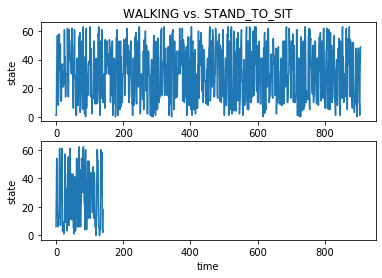

WALKING STAND_TO_SIT -3820.349519239105 False


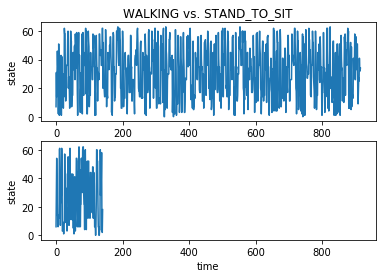

WALKING_UPSTAIRS WALKING -2348.372401124303 False


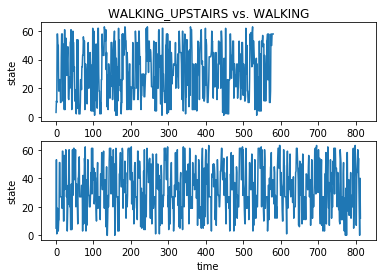

WALKING_UPSTAIRS LIE_TO_SIT -2577.5204131857795 False


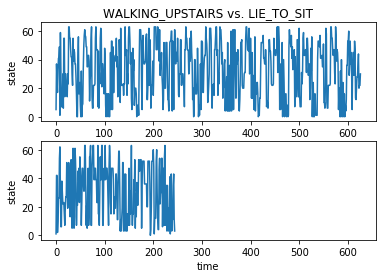

WALKING_UPSTAIRS LAYING -2478.791536979745 False


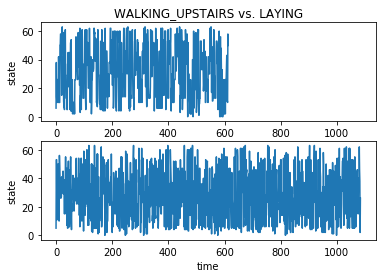

SITTING LAYING -3357.8108358215845 False


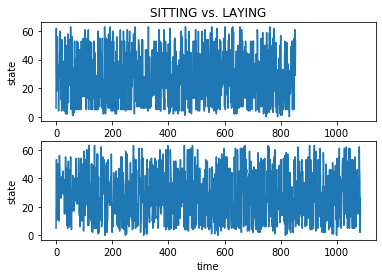

SITTING STANDING -4058.994444650473 False


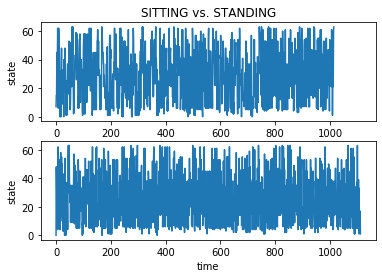

STANDING LAYING -8052.1907717552795 False


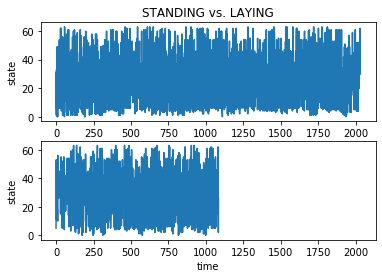

STANDING LAYING -4092.633333938653 False


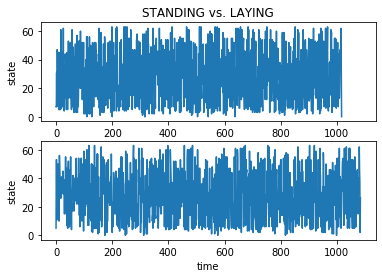

LAYING SITTING -6273.74222434439 False


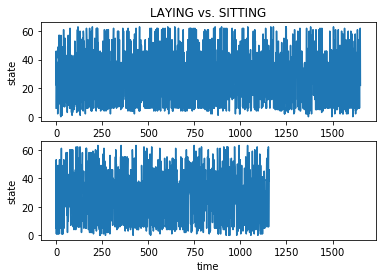

LAYING SITTING -5759.8236409882265 False


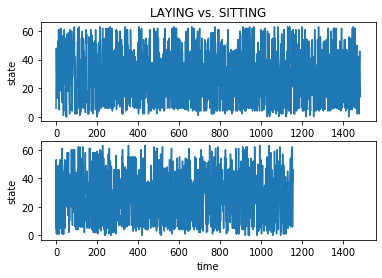

LAYING SITTING -4516.1872340334785 False


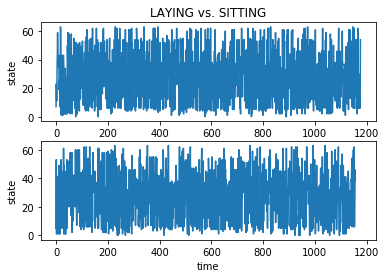

LAYING SITTING -4128.839153046224 False


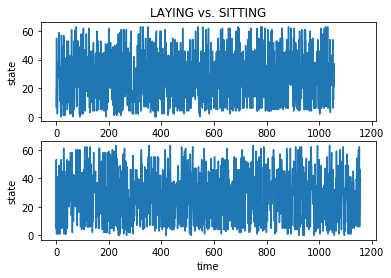

STAND_TO_SIT WALKING_DOWNSTAIRS -606.1178600582471 False


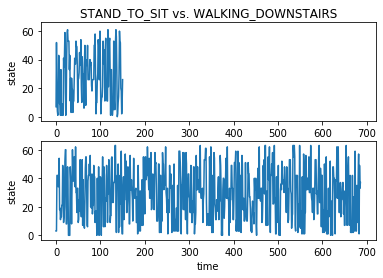

STAND_TO_SIT WALKING -562.101538864785 False


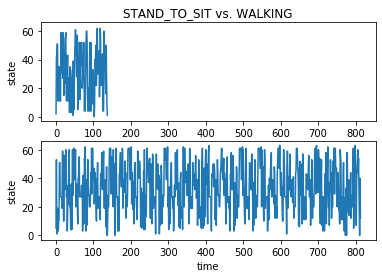

STAND_TO_SIT WALKING_UPSTAIRS -677.9679090312347 False


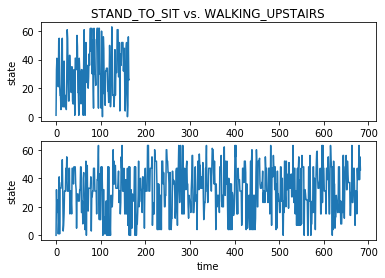

SIT_TO_STAND STAND_TO_SIT -610.6936832346787 False


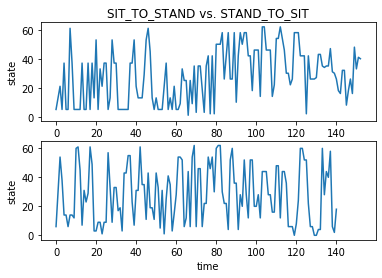

SIT_TO_STAND WALKING_DOWNSTAIRS -409.6760056886033 False


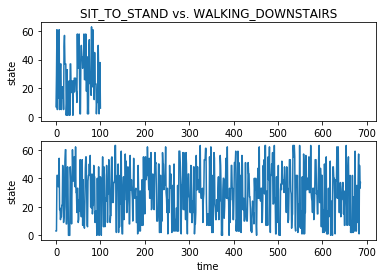

SIT_TO_STAND WALKING_DOWNSTAIRS -567.572817874666 False


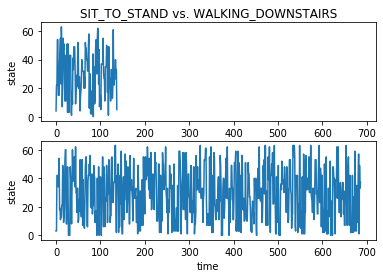

SIT_TO_STAND STAND_TO_SIT -529.285644347364 False


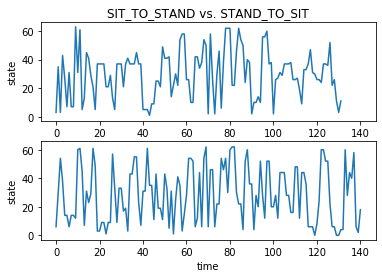

SIT_TO_STAND STAND_TO_SIT -572.2902868342627 False


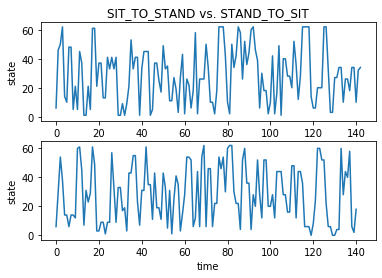

SIT_TO_LIE WALKING_DOWNSTAIRS -654.832149238297 False


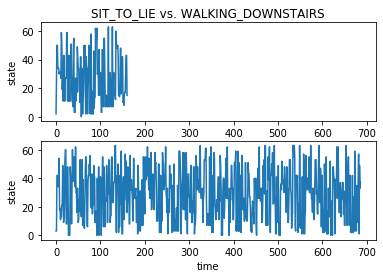

LIE_TO_SIT WALKING -513.7240542276988 False


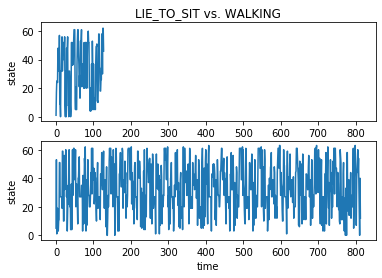

LIE_TO_SIT SITTING -690.4467447496477 False


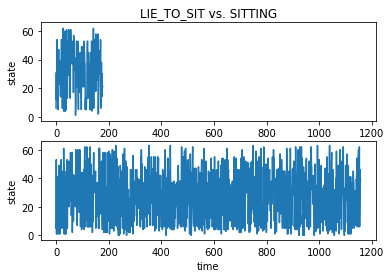

STAND_TO_LIE SIT_TO_LIE -752.4199117540782 False


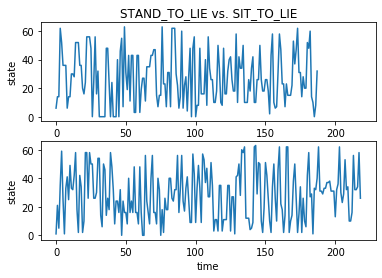

STAND_TO_LIE STANDING -1074.1047302990607 False


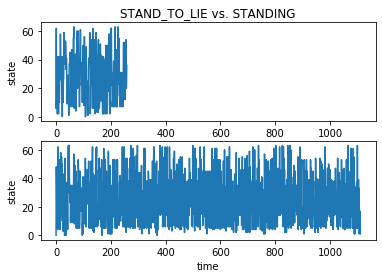

(Wrong, Total) (26, 122)
Accuracy: 78.68852459016394%


In [12]:
new_models = load_hmm_models('jerk8vel8iter1')
test_hmm_models(new_models)